# Gradient descent with theory and code

## Gradient Descent for Linear Regression

### 1. Linear Regression Model
In linear regression, the model can be represented as:

$$
\hat{y}_i = w x_i + b
$$

where:
- $\hat{y}_i$ is the predicted value for the $i-th$ example.
- $w$ is the weight (slope).
- $b$ is the bias (intercept).
- $x_i$ is the input feature for the $i-th$ example.




### 2. Cost Function
The loss function or cost function (Mean Squared Error) measures the difference between the predicted values and the actual values. It is given by:

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

where:
- $m$ is the number of training examples.
- $y_i$ is the actual value for the $i-th$ example.
- $\hat{y}_i$ is the predicted value for the $i-th$ example.

### 3. Gradient Descent Algorithm
Gradient descent aims to minimize the cost function by iteratively updating the parameters $(w)$ and $(b)$. The update rules are:

$$
w := w - \alpha \frac{\partial J(w, b)}{\partial w}
$$

$$
b := b - \alpha \frac{\partial J(w, b)}{\partial b}
$$

where:
- $\alpha$ is the learning rate.
- $\alpha \frac{\partial J(w, b)}{\partial w}$ and $\frac{\partial J(w, b)}{\partial b}$ are the partial derivatives of the cost function with respect to $(w)$ and $(b)$, respectively. (calculated in the next step)


### 4. Partial Derivatives
The partial derivatives of the cost function are:

$$
\frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) x_i
$$

$$
\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)
$$


### 5. Iterative Update
Using these partial derivatives, the parameters are updated iteratively until convergence:

$$
w := w - \alpha \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) x_i
$$

$$
b := b - \alpha \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)
$$

By following these steps, gradient descent helps in finding the optimal values of $(w)$ and $(b)$ that minimize the cost function, thus providing the best-fit line for the data.

### Summary:
---------- 
Linear regression formula:
$$
\hat{y}_i = w x_i + b
$$
--------
Mean Square Error (loss function):
$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

$$
==> J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} ((w x_i + b) - y_i)^2
$$
---------
partial derivatives respect to $(w)$ and $(b)$
$$
\frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} ((w x_i + b) - y_i) \cdot x_i
$$
$$
\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} ((w x_i + b) - y_i)
$$
----------
Updated $(w)$ and $(b)$
$$
w := w - \alpha \frac{1}{m} \sum_{i=1}^{m} ((w x_i + b) - y_i) \cdot x_i
$$

$$
b := b - \alpha \frac{1}{m} \sum_{i=1}^{m} ((w x_i + b) - y_i)
$$
----------

## Let's Code it out

In [169]:
import numpy as np
from matplotlib import pyplot as plt

$$
\hat{y}_i = w x_i + b
$$
$$
Loss = J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

In [170]:
# yhat = wx + b
# loss = J(w,b) =  (1/(2*m)) * ((y-yhat)**2)

In [171]:
# Make some random data as input data
x = np.random.randn(50,1)
x[:5]

array([[ 2.01663701],
       [-0.05474433],
       [-0.1915775 ],
       [-0.46083799],
       [ 1.02643005]])

Actual Bias is: 2
Actual weight is: 5


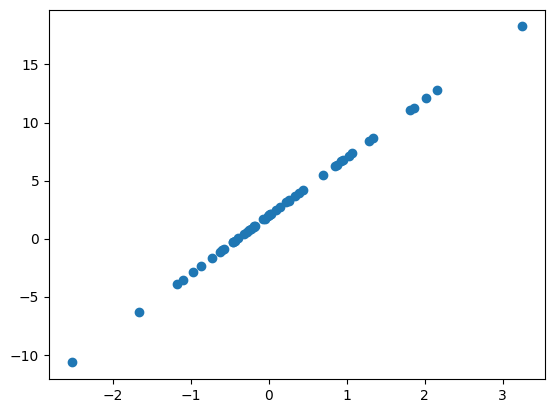

In [172]:
# Initialize some parameters

# Pick some values for the weight and bias which later on we'll see if the gradient descent can figure them out or nor
w_actual = 5
b_actual = 2    

print(f"Actual Bias is: {b_actual}")
print(f"Actual weight is: {w_actual}")

# Make a line using the weight, bias and x 
y = w_actual*x + b_actual

# plot it
plt.scatter(x,y)

Here the fun begins! For a real case senario, we don't know the actual value of the wight and bias. We use Gradient descent to find them. 

In [173]:
# Parameters to find:
weight = 0.0
bias = 0.0

# Hyperparameters
learning_rate = 0.01

The `descend` function updates the weight (`w`) and bias (`b`) in a linear regression model using gradient descent. It calculates the gradients of the loss function with respect to `w` and `b` from the input features (`x`) and target values (`y`), then adjusts `w` and `b` by subtracting the product of the learning rate and the average gradient, aiming to minimize the mean squared error loss.

$$
w := w - \alpha \frac{1}{m} \sum_{i=1}^{m} ((w x_i + b) - y_i) \cdot x_i
$$

$$
b := b - \alpha \frac{1}{m} \sum_{i=1}^{m} ((w x_i + b) - y_i)
$$

In [174]:
# Create gradient descent function
def descend(x, y, w, b, learning_rate):
    
    dJdw = 0.0  # Initialize gradient for weight
    dJdb = 0.0  # Initialize gradient for bias
    
    m = x.shape[0]  # Number of data points
    
    for xi, yi in zip(x, y):
        dJdw += xi*((w*xi+b)-yi)  # Accumulate gradient for weight
        dJdb += ((w*xi+b)-yi)  # Accumulate gradient for bias
        
    # Make an Update to the w parameter
    w = w - learning_rate * (1/m) * dJdw  # Update weight
    b = b - learning_rate * (1/m) * dJdb  # Update bias
    
    return w, b  # Return updated parameters


Actual weight is: 5 | Actual Bias is: 2
----------
For epoch 0 -> loss is: [16.27943209], parameters-> weight:[0.05550176], bias: [0.02787493]
For epoch 50 -> loss is: [5.10352654], parameters-> weight:[2.16355693], bias: [1.03861834]
For epoch 100 -> loss is: [1.61587971], parameters-> weight:[3.36476432], bias: [1.5516288]
For epoch 150 -> loss is: [0.51811789], parameters-> weight:[4.05223016], bias: [1.80576159]
For epoch 200 -> loss is: [0.1687513], parameters-> weight:[4.44755474], bias: [1.92725217]
For epoch 250 -> loss is: [0.05600659], parameters-> weight:[4.67605824], bias: [1.98215706]
For epoch 300 -> loss is: [0.01899744], parameters-> weight:[4.80886608], bias: [2.00459661]
For epoch 350 -> loss is: [0.00660153], parameters-> weight:[4.88650593], bias: [2.01189064]


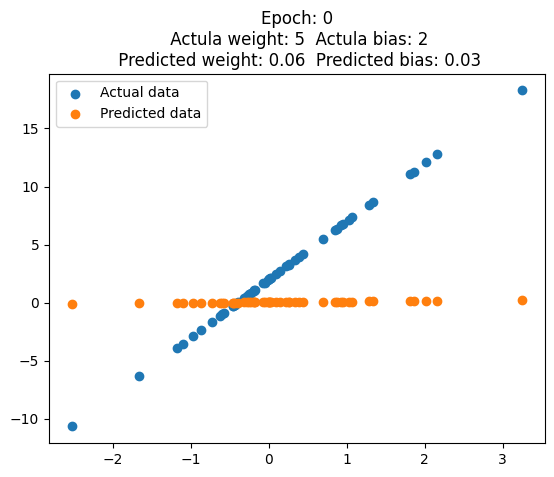

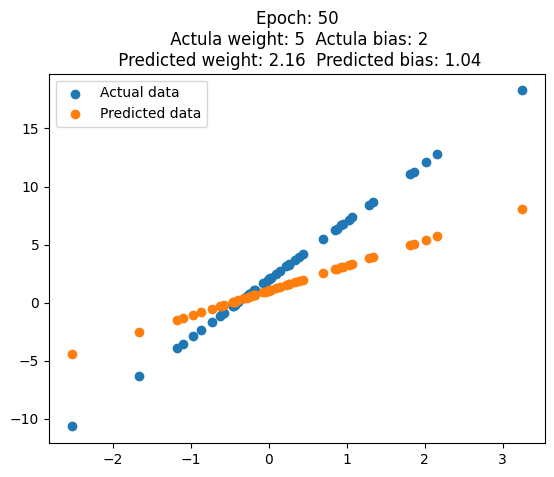

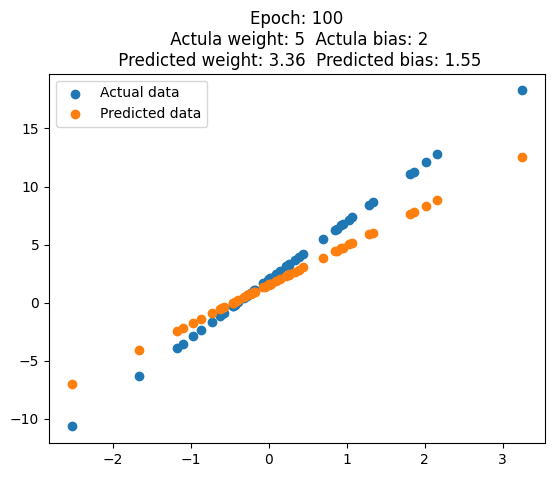

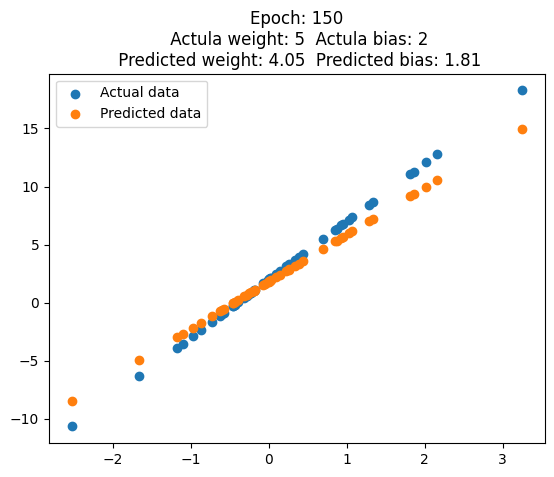

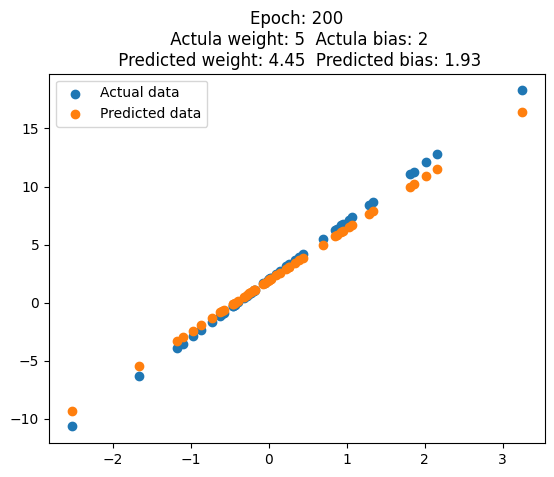

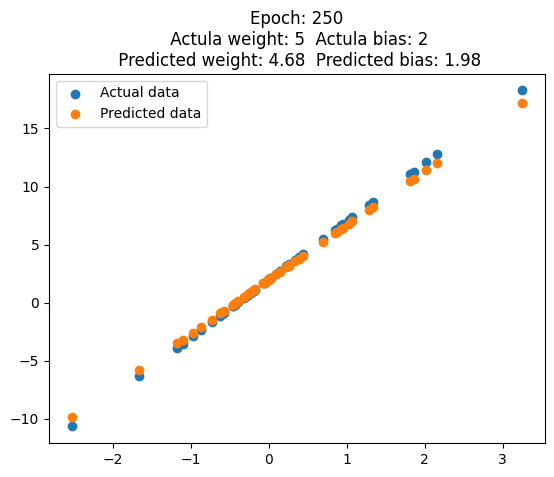

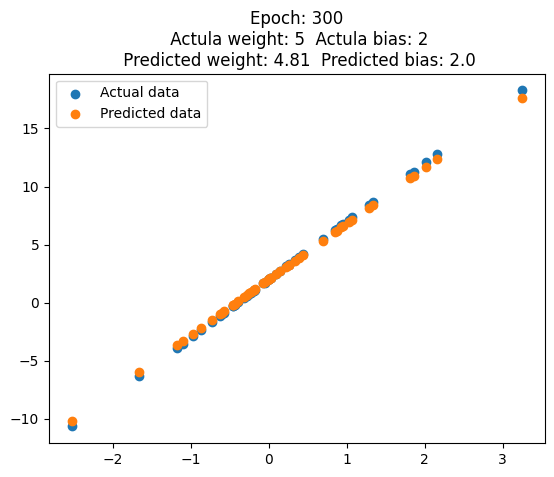

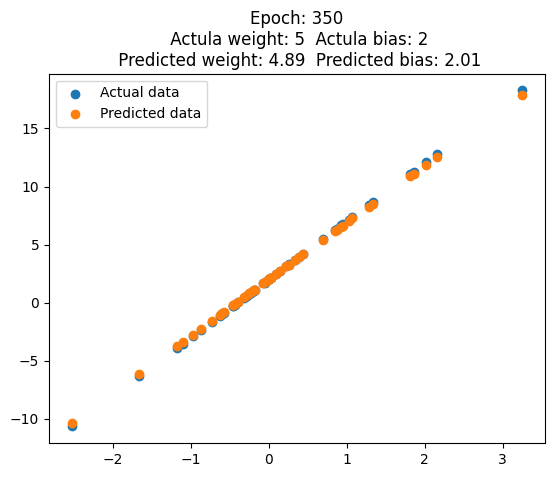

In [175]:
print(f"Actual weight is: {w_actual} | Actual Bias is: {b_actual}")
print('----------')
# Iteratively make Updates
for epoch in range(400):  # Loop over 400 epochs
    # Run gradient descent
    weight, bias = descend(x, y, weight, bias, learning_rate)  # Update weight and bias
    yhat = weight*x + bias  # Calculate predictions
    m = x.shape[0]  # Number of Samples
    loss = np.divide(np.sum((y-yhat)**2, axis=0), 2*m)  # Compute mean squared error loss
    if epoch % 50 == 0:  # Every 50 epochs
        plt.figure()
        plt.scatter(x,y,label='Actual data')
        plt.scatter(x,yhat,label='Predicted data')
        plt.title(f'Epoch: {epoch}\n Actula weight: {w_actual}  Actula bias: {b_actual}\n Predicted weight: {round(weight[0],2)}  Predicted bias: {round(bias[0],2)}')
        plt.legend()
        print(f"For epoch {epoch} -> loss is: {loss}, parameters-> weight:{weight}, bias: {bias}")  # Print loss and parameters

Resources:

- https://www.youtube.com/watch?v=Souzjv6WfrY&t=361s
- https://www.youtube.com/watch?v=sDv4f4s2SB8